In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass
                
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)
         
        
if REBUILD_DATA:
    dogsvscats = DogsVSCats()
    dogsvscats.make_training_data()
    
    

PetImages/Cat


100%|██████████| 12501/12501 [00:30<00:00, 407.22it/s]


PetImages/Dog


100%|██████████| 12501/12501 [00:36<00:00, 338.49it/s]


Cats:  12476
Dogs:  12470


In [5]:
training_data = np.load("training_data.npy", allow_pickle=True)

(24946, 2)


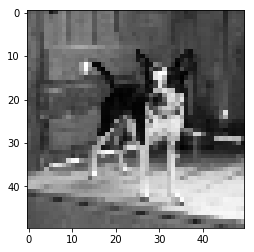

In [14]:
import matplotlib.pyplot as plt

plt.imshow(training_data[0][0], cmap="gray")


In [ ]:
import torch
import torch.nn as nn